In [10]:
from mxnet import gluon
import mxnet as mx
from mxnet import nd
from mxnet.gluon import nn 
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import PIL.Image

from gluoncv.data import VOCSegmentation, VOCAugSegmentation

%matplotlib inline

In [24]:
voc2012 = "/data/dataset/voc/VOC2012/ImageSets/Segmentation"
vocaug = "/data/dataset/voc/VOCaug/dataset"

In [29]:
with open("/data/dataset/voc/VOCaug/dataset/trainval.txt") as f:
    vocaug_all = []
    for line in f:        
        vocaug_all.append(line.strip())

In [31]:
assert len(set(vocaug_all))==len(vocaug_all)

In [33]:
with open("/data/dataset/voc/VOC2012/ImageSets/Segmentation/trainval.txt") as f:
    voc_trainval = []
    for line in f:        
        voc_trainval.append(line.strip())

In [35]:
len(voc_trainval)

2913

In [36]:
assert len(set(voc_trainval))==len(voc_trainval)

In [37]:
len(vocaug_all)

11355

In [38]:
voc_plus = []
cnt=0
for l in vocaug_all:
    if l not in voc_trainval:
        voc_plus.append(l)
    else:
        cnt+=1
        print("exists!")
cnt

exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!
exists!


2237

In [43]:
len(voc_plus)

9118

In [3]:
from mylib.deeplabv3p import DeepLabv3p

In [4]:
model = DeepLabv3p(OS=8)
model.initialize(ctx=mx.gpu())
# weights = "/home/jiancheng/code/segmentation/deeplabv3p_gluon/tmp_weights/pascal_trainval/pascal_trainval.params"
weights = '/home/jiancheng/code/segmentation/deeplabv3p_gluon/tmp_weights/pascal_train_aug/pascal_train_aug.params'
model.load_params(filename=weights, ctx=mx.gpu())

In [22]:
dataset = VOCSegmentation(split='trainval')

RuntimeError: Unknown dataset split.

In [23]:
len(dataset)

1449

In [5]:
# inputs = nd.random_uniform(shape=(1,3,512,512),ctx=mx.gpu())

In [6]:
# model(inputs).shape

In [7]:
# model.collect_params()

In [8]:
model.collect_params()

deeplabv3p0_ (
  Parameter entry_flow_conv1_1_weight (shape=(32, 3, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_gamma (shape=(32,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_beta (shape=(32,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_running_mean (shape=(32,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_running_var (shape=(32,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_weight (shape=(64, 32, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_gamma (shape=(64,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_beta (shape=(64,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_running_mean (shape=(64,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_running_var (shape=(64,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_block1_separable_conv1_depthwise_weight (shape=(64, 1, 3, 3), dtype=<class 

In [9]:
dataset = VOCSegmentation(split='val')

In [9]:
len(dataset)

1449

In [10]:
x,y = dataset[34]

In [11]:
y.max()


[ 12.]
<NDArray 1 @cpu(0)>

In [12]:
y.asnumpy()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [13]:
x.shape

(480, 480, 3)

In [14]:
# x.asnumpy().transpose(1,2,0)

In [15]:
x.max()


[ 253.]
<NDArray 1 @cpu(0)>

In [16]:
x.min()


[ 0.]
<NDArray 1 @cpu(0)>

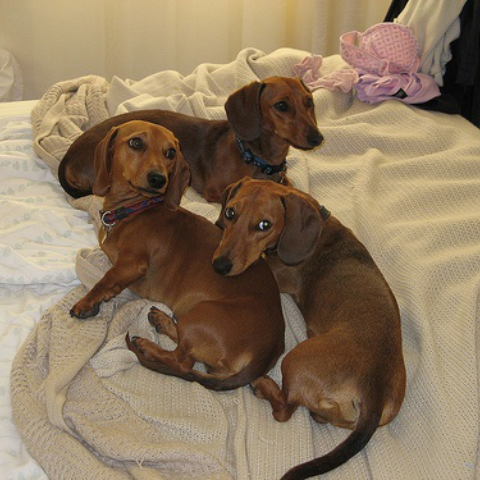

In [17]:
PIL.Image.fromarray(x.asnumpy().astype(np.uint8))

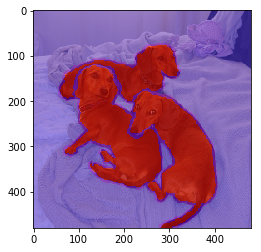

In [18]:
plt.imshow(x.asnumpy().astype(np.uint8))
plt.imshow((y.asnumpy()*20),alpha=0.5,cmap=plt.cm.rainbow)

In [19]:
inputs = x.transpose((2,0,1)).expand_dims(0).copyto(mx.gpu()) / 127.5 - 1

In [20]:
inputs


[[[[ 0.42745101  0.41960788  0.4039216  ..., -0.78039217 -0.78823531
    -0.84313726]
   [ 0.41960788  0.41176474  0.41176474 ..., -0.78823531 -0.80392158
    -0.8509804 ]
   [ 0.41176474  0.4039216   0.41176474 ..., -0.78823531 -0.81176472
    -0.8509804 ]
   ..., 
   [ 0.67058825  0.66274512  0.66274512 ...,  0.3176471   0.33333337
     0.34901965]
   [ 0.67058825  0.67058825  0.67058825 ...,  0.3176471   0.35686278
     0.34117651]
   [ 0.64705884  0.65490198  0.66274512 ...,  0.29411769  0.35686278
     0.33333337]]

  [[ 0.24705887  0.23921573  0.23137259 ..., -0.78823531 -0.78039217
    -0.83529413]
   [ 0.23921573  0.23137259  0.23921573 ..., -0.79607844 -0.80392158
    -0.84313726]
   [ 0.23137259  0.22352946  0.23921573 ..., -0.79607844 -0.81176472
    -0.8509804 ]
   ..., 
   [ 0.62352943  0.6156863   0.60784316 ...,  0.21568632  0.21568632
     0.23137259]
   [ 0.62352943  0.6156863   0.60784316 ...,  0.22352946  0.24705887
     0.22352946]
   [ 0.60000002  0.60784316  0.60

In [21]:
res = model(inputs)

In [22]:
labels = np.argmax(res.asnumpy().squeeze(),0)

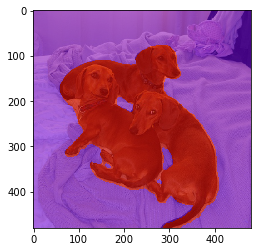

In [23]:
plt.imshow(x.asnumpy().astype(np.uint8))
plt.imshow(labels*20,alpha=.5,cmap=plt.cm.rainbow)

In [24]:
y.

SyntaxError: invalid syntax (<ipython-input-24-0aefab377acb>, line 1)

In [ ]:
(y==0).sum()